# Makemore pt 2
Build a character-level language model that has greater than one character of context using a multilayer perceptron.
It follows [Bengio et al 2003](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

In [9]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import random

In [10]:
# Mac OS GPU acceleration or CPU
device = torch.device("cpu" if torch.backends.mps.is_available() else "cpu")
print(device)

cpu


In [11]:
# Load names from file
words = open('names.txt', 'r').read().splitlines()
print(words[:5])
print(len(words))

['emma', 'olivia', 'ava', 'isabella', 'sophia']
32033


In [12]:
# Create vocab of characters to integers
chars = sorted(list(set(''.join(words))))
stoi = {c: i+1 for i, c in enumerate(chars)}
stoi['.'] = 0
itos = {i: c for c, i in stoi.items()}
print('stoi', stoi)
print('itos', itos)

stoi {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
itos {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [13]:
# Create dataset
block_size = 4 # char context length

def build_dataset(words):
    X, Y = [], [] # X = Data, Y = Target
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch] # next char to be predicted and added to context
            X.append(context)
            Y.append(ix)

            context = context[1:] + [ix]
    X = torch.tensor(X, device=device)
    Y = torch.tensor(Y, device=device)
    return X, Y

train_n = int(len(words) * 0.8)
dev_n = int(len(words) * 0.1)
test_n = len(words) - train_n - dev_n
random.shuffle(words)
train_words = words[:train_n]
dev_words = words[train_n:train_n+dev_n]
test_words = words[train_n+dev_n:]

train_X, train_Y = build_dataset(train_words)
dev_X, dev_Y = build_dataset(dev_words)
test_X, test_Y = build_dataset(test_words)

13897


  0%|          | 303/200000 [00:00<01:06, 3024.37it/s]

train loss step 0: 26.011259078979492
dev loss step 0: 25.843570709228516


  5%|▌         | 10655/200000 [00:02<00:45, 4141.54it/s]

train loss step 10000: 2.14829421043396
dev loss step 10000: 2.566032886505127


 10%|█         | 20605/200000 [00:05<00:43, 4149.38it/s]

train loss step 20000: 2.5358219146728516
dev loss step 20000: 2.47729754447937


 15%|█▌        | 30452/200000 [00:07<00:40, 4168.89it/s]

train loss step 30000: 2.3096272945404053
dev loss step 30000: 2.4097530841827393


 20%|██        | 40594/200000 [00:09<00:39, 4086.33it/s]

train loss step 40000: 2.4548468589782715
dev loss step 40000: 2.466860055923462


 25%|██▌       | 50618/200000 [00:12<00:38, 3917.33it/s]

train loss step 50000: 2.172020673751831
dev loss step 50000: 2.3835983276367188


 30%|███       | 60635/200000 [00:14<00:34, 4096.16it/s]

train loss step 60000: 2.5809688568115234
dev loss step 60000: 2.389174222946167


 35%|███▌      | 70471/200000 [00:17<00:32, 3961.66it/s]

train loss step 70000: 2.4565346240997314
dev loss step 70000: 2.4304869174957275


 40%|████      | 80658/200000 [00:19<00:28, 4123.93it/s]

train loss step 80000: 2.501605272293091
dev loss step 80000: 2.3155014514923096


 45%|████▌     | 90783/200000 [00:22<00:26, 4056.82it/s]

train loss step 90000: 2.195702075958252
dev loss step 90000: 2.3834664821624756


 50%|█████     | 100542/200000 [00:24<00:25, 3909.62it/s]

train loss step 100000: 2.1918375492095947
dev loss step 100000: 2.4081108570098877


 55%|█████▌    | 110591/200000 [00:26<00:21, 4137.31it/s]

train loss step 110000: 2.1604559421539307
dev loss step 110000: 2.4551854133605957


 60%|██████    | 120349/200000 [00:29<00:19, 3987.96it/s]

train loss step 120000: 1.8764830827713013
dev loss step 120000: 2.4017257690429688


 65%|██████▌   | 130729/200000 [00:31<00:17, 4061.64it/s]

train loss step 130000: 2.5260086059570312
dev loss step 130000: 2.2875077724456787


 70%|███████   | 140453/200000 [00:34<00:14, 4119.34it/s]

train loss step 140000: 2.141312599182129
dev loss step 140000: 2.353511095046997


 75%|███████▌  | 150698/200000 [00:36<00:11, 4158.10it/s]

train loss step 150000: 2.153996467590332
dev loss step 150000: 2.297333240509033


 80%|████████  | 160423/200000 [00:38<00:09, 4073.72it/s]

train loss step 160000: 2.485530376434326
dev loss step 160000: 2.2620608806610107


 85%|████████▌ | 170529/200000 [00:41<00:07, 4165.44it/s]

train loss step 170000: 2.054004669189453
dev loss step 170000: 2.2014880180358887


 90%|█████████ | 180702/200000 [00:43<00:04, 4148.11it/s]

train loss step 180000: 1.9606398344039917
dev loss step 180000: 2.2059326171875


 95%|█████████▌| 190436/200000 [00:46<00:02, 3985.95it/s]

train loss step 190000: 2.0714025497436523
dev loss step 190000: 2.212656021118164


100%|██████████| 200000/200000 [00:48<00:00, 4133.09it/s]


train loss final: 2.3234894275665283
dev loss final: 2.20475697517395
test loss final: 2.201038122177124


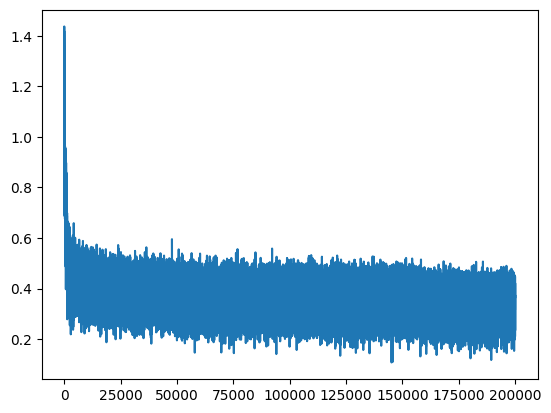

In [14]:
# Build C matrix = character-level embeddings to be used as inputs vectors
g = torch.Generator().manual_seed(2147483647)

C_dim = 10
C = torch.randn((27, C_dim), generator=g, device=device)
fc_layer_size = 200

# Indexing into C is the same as one hot encoded vector @ C
# emb = C[X]

# Define the weight matrix
W1 = torch.randn((block_size * C_dim,fc_layer_size), generator=g, device=device)
b1 = torch.randn(fc_layer_size, generator=g, device=device)

# Output layer
W2 = torch.randn((fc_layer_size,27), generator=g, device=device)
b2 = torch.randn(27, generator=g, device=device)

# Sum number of parameters
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

print(sum(p.numel() for p in parameters))

# Hyperparameter search through possibl elearning rates
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
# print(lrs)

lri, lossi, stepi = [], [], []

# Hyperparameters
num_steps = 200000
batch_size = 32

# Full training loop
for i in tqdm(range(num_steps)):

    # Minibatch construction
    ix = torch.randint(0, train_X.shape[0], (batch_size,), device=device)

    emb = C[train_X[ix]]

    h = torch.tanh(emb.view(-1,block_size * C_dim) @ W1 + b1)
    logits = h @ W2 + b2

    # Softmax
    loss = F.cross_entropy(logits, train_Y[ix])

    # prob = F.softmax(logits, dim=1)
    # print(prob[0,:].sum())

    # # Compute loss
    # loss = - prob[torch.arange(32), Y].log().mean()

    # Backward pass
    for p in parameters:
        p.grad = None

    loss.backward()
    # Update parameters
    # lr = lrs[i] # used for testing
    if i < num_steps / 5 * 4:
        lr = 0.1 
    else:
        lr = 0.05
    # else:
    #     lr = 0.001

    for p in parameters:
        p.data -= lr * p.grad
    
    # Track stats    
    # lri.append(lr)
    lossi.append(loss.log10().item())
    stepi.append(i)

    if i % 10000 == 0:
        # Eval (trying to beat loss = 2.17)
        print(f'train loss step {i}: {loss.item()}')

        emb = C[dev_X]
        h = torch.tanh(emb.view(-1,block_size * C_dim) @ W1 + b1)
        logits = h @ W2 + b2
        loss = F.cross_entropy(logits, dev_Y)
        print(f'dev loss step {i}: {loss.item()}')

print(f'train loss final: {loss.item()}')

# Dev loss
emb = C[dev_X]
h = torch.tanh(emb.view(-1,block_size * C_dim) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, dev_Y)
print(f'dev loss final: {loss.item()}')

# Test (trying to beat loss = 2.17)
emb = C[test_X]
h = torch.tanh(emb.view(-1, block_size * C_dim) @ W1 + b1)

logits = h @ W2 + b2
loss = F.cross_entropy(logits, test_Y)

print(f'test loss final: {loss.item()}')

# Plot loss
plt.plot(stepi, lossi)


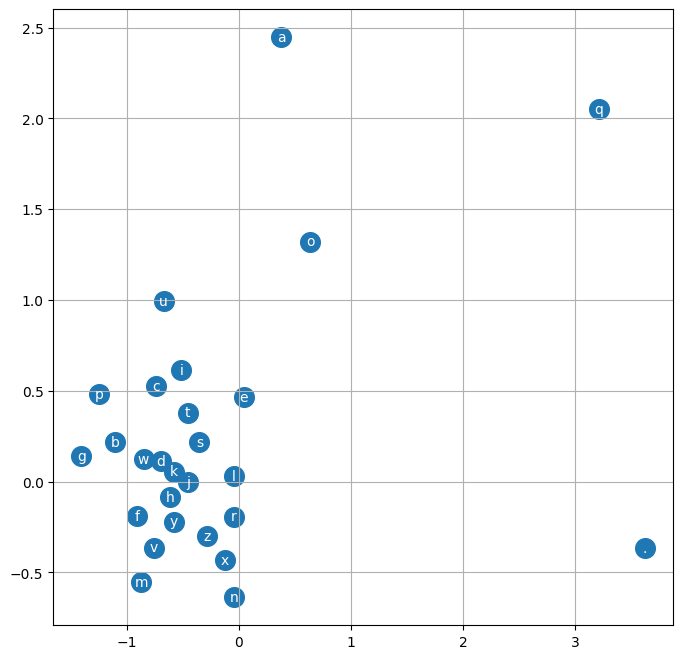

In [15]:
# Embedding locations
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], color='white', ha='center', va='center')
plt.grid('minor')

In [16]:
# Seeing results
for _ in range(20):

    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor(context)]
        h = torch.tanh(emb.view(-1,block_size * C_dim) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[ix] for ix in out))

alee.
kali.
kordrequadrakyntie.
szabeshriestiann.
emamiyah.
esman.
leyna.
veah.
nahura.
esam.
genext.
soran.
yonna.
keana.
orlises.
asanla.
xyxandreen.
leyly.
tecob.
lyelina.
